In [1]:
import numpy as np
import pandas as pd
import sys
import os

In [2]:
if not sys.modules.get('matplotlib'):
    os.system('pip3 install matplotlib')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mat

if not sys.modules.get('seaborn'):
    os.system('pip3 install seaborn')
import seaborn as sns

if not sys.modules.get('openpyxl'):
    os.system('pip3 install openpyxl')
import openpyxl

In [3]:
%matplotlib inline

# 1. 해당 데이터셋 확인

In [4]:
seoul = pd.read_csv("서울시 연평균기온 2005-2008년 위치정보.csv", encoding='euc-kr')

In [5]:
seoul

,year,o.code,o.name,o.addr,temp,long,lat
0,2005,509,관악,서울특별시 관악구 신림동 산56-1 (서울대학교),10.939155,126.950219,37.452863
1,2005,417,금천,서울특별시 금천구 독산동 1034 (독산초등학교),12.970996,126.914121,37.460314
2,2005,401,서초,서울특별시 서초구 서초동 1650 (서울교육대학교),13.130697,127.017913,37.482814
3,2005,423,구로,서울특별시 구로구 궁동 213-42 (수궁동사무소),12.050353,126.831229,37.486113
4,2005,410,기상청,서울특별시 동작구 신대방동 460-18 (기상청),12.605726,126.920722,37.496314
...,...,...,...,...,...,...,...
103,2008,420,북한산,서울특별시 종로구 구기동 산1 (승가사),10.466606,126.954419,37.618295
104,2008,407,노원,서울특별시 노원구 공릉동 230-3 (육군사관학교),12.293329,127.087304,37.622196
105,2008,424,강북,서울특별시 강북구 수유동 192-49 (강북구청 본관),13.209383,126.999613,37.636093
106,2008,406,도봉,서울특별시 도봉구 방학동 310 (신방학초등학교),12.563567,127.033110,37.666091


In [6]:
seoul.shape

(108, 7)

# 2. 각 관측소별로 2005~2008년 평균 기온

In [7]:
seoul.dtypes

year        int64
o.code      int64
o.name     object
o.addr     object
temp      float64
long      float64
lat       float64
dtype: object

In [8]:
mean_temp = seoul[['o.name','temp']].groupby('o.name').mean()

In [9]:
mean_temp = mean_temp.reset_index()

In [10]:
mean_temp.dtypes

o.name     object
temp      float64
dtype: object

In [11]:
mean_temp

,o.name,temp
0,강남,13.635377
1,강동,12.685284
2,강북,13.546316
3,강서,13.056811
4,관악,11.726874
5,광진,13.852486
6,구로,12.784528
7,금천,13.465832
8,기상청,13.391981
9,노원,12.347684


# 3. 그래프로 나타내기

In [12]:
index = np.arange(len(mean_temp['o.name']))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [13]:
path = 'C:\\Users\\광호컴\\Desktop\\기술 테스트\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=15)
fontname = fontprop.get_name()

In [14]:
mat.rc('font', family = fontname)

In [15]:
x = mean_temp['o.name']
y = mean_temp['temp']

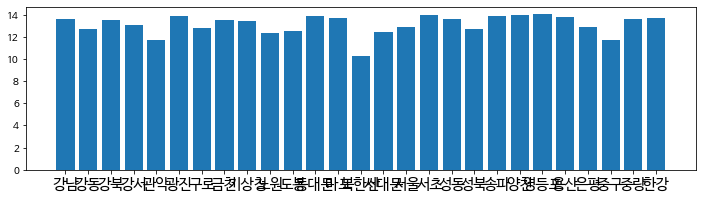

In [27]:
plt.figure(figsize=(12,3))
plt.bar(x,y)
plt.xticks(x, fontproperties=fontprop)
plt.show()

# 4. 상하위 3위까지 뽑기

In [18]:
type(mean_temp)

pandas.core.frame.DataFrame

In [19]:
mean_temp.sort_values('temp')[0:3]

,o.name,temp
13,북한산,10.278529
24,중구,11.691647
4,관악,11.726874


In [20]:
mean_temp.sort_values('temp', ascending=False)[0:3]

,o.name,temp
21,영등포,14.003217
20,양천,13.975639
16,서초,13.922199


# 5. 4년간 기온의 추이

In [21]:
seoul

,year,o.code,o.name,o.addr,temp,long,lat
0,2005,509,관악,서울특별시 관악구 신림동 산56-1 (서울대학교),10.939155,126.950219,37.452863
1,2005,417,금천,서울특별시 금천구 독산동 1034 (독산초등학교),12.970996,126.914121,37.460314
2,2005,401,서초,서울특별시 서초구 서초동 1650 (서울교육대학교),13.130697,127.017913,37.482814
3,2005,423,구로,서울특별시 구로구 궁동 213-42 (수궁동사무소),12.050353,126.831229,37.486113
4,2005,410,기상청,서울특별시 동작구 신대방동 460-18 (기상청),12.605726,126.920722,37.496314
...,...,...,...,...,...,...,...
103,2008,420,북한산,서울특별시 종로구 구기동 산1 (승가사),10.466606,126.954419,37.618295
104,2008,407,노원,서울특별시 노원구 공릉동 230-3 (육군사관학교),12.293329,127.087304,37.622196
105,2008,424,강북,서울특별시 강북구 수유동 192-49 (강북구청 본관),13.209383,126.999613,37.636093
106,2008,406,도봉,서울특별시 도봉구 방학동 310 (신방학초등학교),12.563567,127.033110,37.666091


In [25]:
name = seoul['o.name'].unique()
name = pd.Series(name)
name = name.sort_values()
name

6      강남
15     강동
24     강북
14     강서
0      관악
11     광진
3      구로
1      금천
4     기상청
23     노원
25     도봉
18    동대문
12     마포
22    북한산
17    서대문
26     서울
2      서초
13     성동
21     성북
5      송파
9      양천
10    영등포
7      용산
20     은평
16     중구
19     중랑
8      한강
dtype: object

In [34]:
ye = seoul['year'].unique()
ye = pd.Series(ye)
ye = ye.sort_values()
ye

0    2005
1    2006
2    2007
3    2008
dtype: int64

In [184]:
pro = pd.DataFrame()

In [185]:
s5 = seoul[seoul.year==2005].sort_values('o.name').reset_index()
s6 = seoul[seoul.year==2006].sort_values('o.name').reset_index()
s7 = seoul[seoul.year==2007].sort_values('o.name').reset_index()
s8 = seoul[seoul.year==2008].sort_values('o.name').reset_index()

In [186]:
pro['2005'] = s5['temp']
pro['2006'] = s6['temp']
pro['2007'] = s7['temp']
pro['2008'] = s8['temp']

In [187]:
pro.head()

,2005,2006,2007,2008
0,12.813337,13.834787,14.112383,13.781000
1,11.968560,12.835833,13.011433,12.925312
2,12.901040,13.937688,14.137155,13.209383
3,12.236410,13.290343,13.536903,13.163588
4,10.939155,11.964182,12.206846,11.797313


In [177]:
t_56 = np.empty((27,1), object)
t_56 = pd.DataFrame(t_56)

t_67 = np.empty((27,1), object)
t_67 = pd.DataFrame(t_67)

t_78 = np.empty((27,1), object)
t_78 = pd.DataFrame(t_78)

In [155]:
pro.iat[1,1]

12.835833

In [154]:
pro.iloc[1,1]

12.835833

In [178]:
for i in t_56:
    if pro.iloc[i,1] - pro.iloc[i,0] > 0:
        t_56[i] = '증가'
    elif pro.iloc[i,1] == pro.iloc[i,0] == 0:
        t_56[i] = '일정'
    else :
        t_56[i] = '감소'

In [179]:
for i in t_67:
    if pro.iloc[i,2] - pro.iloc[i,1] > 0:
        t_67[i] = '증가'
    elif pro.iloc[i,2] == pro.iloc[i,1] == 0:
        t_67[i] = '일정'
    else :
        t_67[i] = '감소'

In [180]:
for i in t_78:
    if pro.iloc[i,3] - pro.iloc[i,2] > 0:
        t_78[i] = '증가'
    elif pro.iloc[i,3] == pro.iloc[i,2] == 0:
        t_78[i] = '일정'
    else :
        t_78[i] = '감소'

In [188]:
pro = pd.concat([pro, t_56, t_67, t_78], axis=1)

In [190]:
pro.index = name

In [204]:
pro.columns = ['2005', '2006', '2007', '2008', '5~6년 추이', '6~7년 추이', '7~8년 추이']

In [206]:
pro.head(13)

,2005,2006,2007,2008,5~6년 추이,6~7년 추이,7~8년 추이
강남,12.813337,13.834787,14.112383,13.781000,증가,증가,감소
강동,11.968560,12.835833,13.011433,12.925312,증가,증가,감소
강북,12.901040,13.937688,14.137155,13.209383,증가,증가,감소
강서,12.236410,13.290343,13.536903,13.163588,증가,증가,감소
관악,10.939155,11.964182,12.206846,11.797313,증가,증가,감소
광진,12.990001,14.052908,14.320333,14.046702,증가,증가,감소
구로,12.050353,12.961506,13.232561,12.893690,증가,증가,감소
금천,12.970996,14.006834,13.411606,13.473894,증가,증가,감소
기상청,12.605726,13.611210,13.825860,13.525126,증가,증가,감소
노원,11.743057,12.581490,12.772860,12.293329,증가,증가,감소


In [209]:
pro.tail(14)

,2005,2006,2007,2008,5~6년 추이,6~7년 추이,7~8년 추이
북한산,9.372827,10.527479,10.747206,10.466606,증가,증가,감소
서대문,11.408231,12.742022,13.115240,12.547462,증가,증가,감소
서울,12.139452,13.061918,13.282740,12.964208,증가,증가,감소
서초,13.130697,14.109899,14.377770,14.070429,증가,증가,감소
성동,12.768622,13.961277,14.076525,13.757884,증가,증가,감소
성북,11.900301,12.943855,13.154247,12.842907,증가,증가,감소
송파,13.076199,14.155950,14.315018,13.869747,증가,증가,감소
양천,13.141856,14.163943,14.457177,14.139579,증가,증가,감소
영등포,13.160809,14.283136,14.467439,14.101486,증가,증가,감소
용산,12.984055,14.022136,14.298364,13.783836,증가,증가,감소
